<b>Hacktiv8 Kartu Prakerja Final Project Notebook</b>
    
Dalam notebook ini saya mengerjakan proyek akhir dari <b> Hacktiv8 Kartu Prakerja course "Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database"</b>.\
Dataset yang dipakai berjudul "Heart Disease UCI" yang diunduh dari : \
https://www.kaggle.com/ronitf/heart-disease-uci



<b>Feature attribute information</b>

1.	age: usia dalam tahun
2.	sex: jenis kelamin (1 = laki-laki, 0 = perempuan)
3.	cp: tipe penyakit dada yg dialami (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
4.	trestbps: tekanan darah kondisi normal (mm Hg saat masuk rumah sakit)
5.	chol: tingkat kolestrol dalam mg/dl
6.	fbs: gula darah dalam kondisi puasa (> 120 mg/dl, 1 = true; 0 = false)
7.	restecg: pengukuran elektrokardiograf
<br>(0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
8.	thalach: jumlah detak jantung maksimum
9.	exang: Exercise induced angina (1 = yes; 0 = no)
10.	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
11.	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
12.	ca: The number of major vessels (0-3)
13.	thal: kelainan darah berupa thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
14.	target: keadaan penyakit jantung (0 = no/tidak ada, 1 = yes/ada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### import dataset

In [2]:
url='https://drive.google.com/file/d/1mJ-noOJI3CmBdGdttYdWDC5lxT4zM-9z/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<b>Comparing Negative and Positive Class on Target column.</b>

target class count :
1    165
0    138
Name: target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


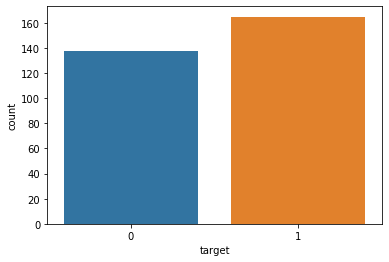

In [5]:
print('target class count :')
print(df['target'].value_counts())

graph1 = sns.countplot(df['target'])
print(graph1)

## Data Explorations

In [6]:
df.corr().sort_values(by='target').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
ca,0.276326,0.118261,-0.181053,0.101389,0.070511,0.137979,-0.072042,-0.213177,0.115739,0.222682,-0.080155,1.000000,0.151832,-0.391724
thal,0.068001,0.210041,-0.161736,0.062210,0.098803,-0.032019,-0.011981,-0.096439,0.206754,0.210244,-0.104764,0.151832,1.000000,-0.344029
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937


In [7]:
df.corr().sort_values(by='target', ascending=False).head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
target,-0.225439,-0.280937,0.433798,-0.144931,-0.085239,-0.028046,0.137230,0.421741,-0.436757,-0.430696,0.345877,-0.391724,-0.344029,1.000000
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
slope,-0.168814,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046


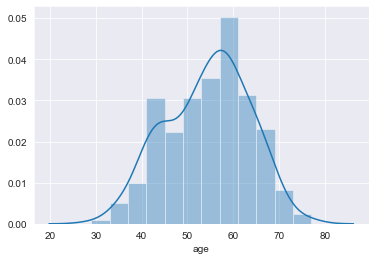

In [8]:
sns.set_style('darkgrid')
sns.distplot(df['age'])
plt.show()

Target Distribution by Sex 
1 = Male | 0 = Female 

sex distribution on target  0


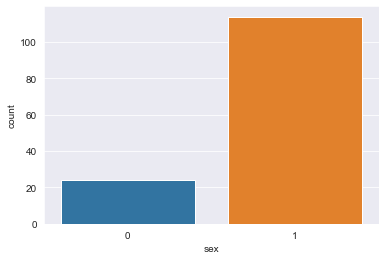

sex distribution on target  1


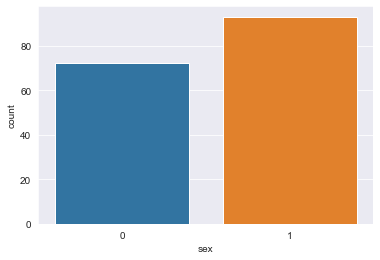

In [9]:
t = [0,1]
print('Target Distribution by Sex \n'  '1 = Male | 0 = Female \n')
for i in t:
    sns.countplot(df[df['target']==i]['sex'])
    print('sex distribution on target ',i)
    plt.show()

<b>dari grafik diatas daapt diambil kesimpulan awal bahwa 

AxesSubplot(0.125,0.125;0.775x0.755)


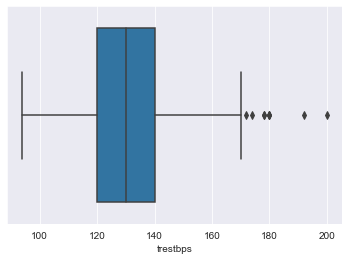

AxesSubplot(0.125,0.125;0.775x0.755)


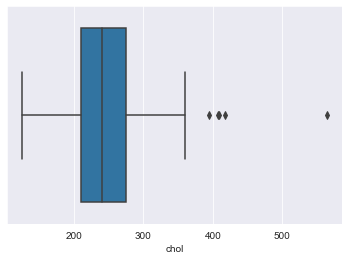

In [10]:
c = ['trestbps','chol']

for i in c:
    print(sns.boxplot(df[i]))
    plt.show()

In [11]:
Q1 = np.percentile(df['chol'], 25)
Q2 = np.percentile(df['chol'], 50)
Q3 = np.percentile(df['chol'], 75)
IQR = Q3-Q1
up_limit = Q3 + (1.5 * IQR) 
lo_limit = Q1 - (1.5 * IQR)
print(Q1, Q2, Q3, IQR, up_limit, lo_limit)


211.0 240.0 274.5 63.5 369.75 115.75


In [12]:
df[(df['chol'] > lo_limit) & (df['chol'] < up_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
Q1 = np.percentile(df['trestbps'], 25)
Q3 = np.percentile(df['trestbps'], 75)
IQR = Q3-Q1
up_limit = Q3 + (1.5 * IQR) 
lo_limit = Q1 - (1.5 * IQR)

In [14]:
df[(df['trestbps'] > lo_limit) & (df['trestbps'] < up_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Train Test Split

In [15]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [16]:
feature = df.drop('target', axis=1)
target  = df['target']

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(feature, target, random_state=101, test_size=0.3)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

C:\Users\GF63\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction_lr = model_lr.predict(x_test)
print(classification_report(y_test, prediction_lr))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.83      0.96      0.89        47

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



In [22]:
print(confusion_matrix(y_test, prediction_lr))

[[35  9]
 [ 2 45]]


### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [25]:
prediction_dt = model_dt.predict(x_test)
print(classification_report(y_test, prediction_dt))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79        44
           1       0.76      0.96      0.85        47

    accuracy                           0.82        91
   macro avg       0.85      0.82      0.82        91
weighted avg       0.85      0.82      0.82        91



In [26]:
print(confusion_matrix(y_test,prediction_dt))

[[30 14]
 [ 2 45]]


### KN Neighbors Classifier

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model_kn = KNeighborsClassifier()
model_kn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
prediction_kn = model_kn.predict(x_test)
print(classification_report(y_test, prediction_kn))

              precision    recall  f1-score   support

           0       0.57      0.52      0.55        44
           1       0.59      0.64      0.61        47

    accuracy                           0.58        91
   macro avg       0.58      0.58      0.58        91
weighted avg       0.58      0.58      0.58        91



### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
prediction_rf = model_rf.predict(x_test)
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.82      0.75      0.79        44
           1       0.78      0.85      0.82        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91



### Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
prediction_nb = model_nb.predict(x_test)
print(classification_report(y_test, prediction_nb))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        44
           1       0.83      0.85      0.84        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



### Support Vector Machine

In [36]:
from sklearn.svm import SVC

In [37]:
model_sv = SVC()
model_sv.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
prediction_sv = model_sv.predict(x_test)
print(classification_report(y_test, prediction_sv))

              precision    recall  f1-score   support

           0       0.77      0.45      0.57        44
           1       0.63      0.87      0.73        47

    accuracy                           0.67        91
   macro avg       0.70      0.66      0.65        91
weighted avg       0.70      0.67      0.65        91

